In [10]:
from exp_framework.Ensemble import Ensemble, PretrainedEnsemble
from exp_framework.delegation import DelegationMechanism, UCBDelegationMechanism
from exp_framework.experiment import Experiment, calculate_avg_std_test_accs
from matplotlib import pyplot as plt
from exp_framework.data_utils import Data
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
batch_size = 128
window_size = 5
num_trials = 2
n_voters = 10

data = Data(
    data_set_name="mnist",
    train_digit_groups=[range(5), range(5, 10)],
    # train_digit_groups=[[0, 1, 2], [3, 4, 5,], [6, 7, 8, 9]],
    # train_digit_groups=[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
    # test_digit_groups=[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]],
    test_digit_groups=[range(5), range(5, 10)],
    batch_size=batch_size,
)

UCB_del_mech = UCBDelegationMechanism(
    batch_size=batch_size, window_size=window_size, ucb_window_size=None
)
NOOP_del_mech = DelegationMechanism(batch_size=batch_size, window_size=window_size)


pretrained_ensemble = PretrainedEnsemble(
    n_voters=n_voters, delegation_mechanism=UCB_del_mech, name="UCB_delegation_ensemble"
)

pretrained_ensemble.do_pretaining(data)

ensembles = [
    pretrained_ensemble,
    Ensemble(
        training_epochs=1,
        n_voters=n_voters,
        delegation_mechanism=NOOP_del_mech,
        name="full_ensemble",
        input_dim=28 * 28,
        output_dim=10,
    ),
]

exp = Experiment(n_trials=num_trials, ensembles=ensembles, data=data)
exp.run()

Switching from digit group range(0, 5) to range(5, 10)
Finished training. Starting testing.
Delegations:  {}
Making delegation from Voter 0 to Voter 8 at t=1.
Making delegation from Voter 1 to Voter 0 at t=1.
Making delegation from Voter 2 to Voter 8 at t=1.
Making delegation from Voter 3 to Voter 8 at t=1.
Making delegation from Voter 4 to Voter 8 at t=1.
Making delegation from Voter 5 to Voter 0 at t=1.
Making delegation from Voter 6 to Voter 8 at t=1.
Making delegation from Voter 7 to Voter 4 at t=1.
Making delegation from Voter 9 to Voter 0 at t=1.
Delegations:  {Voter 0: Voter 8, Voter 1: Voter 0, Voter 2: Voter 8, Voter 3: Voter 8, Voter 4: Voter 8, Voter 5: Voter 0, Voter 6: Voter 8, Voter 7: Voter 4, Voter 9: Voter 0}
Making delegation from Voter 0 to Voter 2 at t=2.
Making delegation from Voter 1 to Voter 4 at t=2.
Making delegation from Voter 2 to Voter 6 at t=2.
Making delegation from Voter 3 to Voter 0 at t=2.
Making delegation from Voter 4 to Voter 6 at t=2.
Making delegat

{'UCB_delegation_ensemble': {0: {'batch_train_acc': [0.96875,
    0.953125,
    0.8984375,
    0.8984375,
    0.859375,
    0.8984375,
    0.859375,
    0.90625,
    0.9140625,
    0.921875,
    0.90625,
    0.953125,
    0.8984375,
    0.921875,
    0.875,
    0.890625,
    0.875,
    0.9375,
    0.953125,
    0.8984375,
    0.890625,
    0.875,
    0.875,
    0.875,
    0.9375,
    0.9375,
    0.90625,
    0.9375,
    0.8828125,
    0.9375,
    0.9296875,
    0.8984375,
    0.8984375,
    0.9453125,
    0.90625,
    0.8828125,
    0.875,
    0.9609375,
    0.9140625,
    0.859375,
    0.90625,
    0.8984375,
    0.90625,
    0.921875,
    0.90625,
    0.9296875,
    0.8984375,
    0.9140625,
    0.9296875,
    0.9296875,
    0.8828125,
    0.8671875,
    0.8984375,
    0.921875,
    0.890625,
    0.953125,
    0.8515625,
    0.921875,
    0.9140625,
    0.8828125,
    0.9140625,
    0.8828125,
    0.90625,
    0.8359375,
    0.90625,
    0.875,
    0.859375,
    0.9296875,
    0.875,

In [3]:
# Example usage
UCB_avg_test_accs, UCB_std_test_accs = calculate_avg_std_test_accs(
    exp, "UCB_delegation_ensemble", num_trials
)
full_avg_test_accs, full_std_test_accs = calculate_avg_std_test_accs(
    exp, "full_ensemble", num_trials
)

In [4]:
print("Mean test accs for UCB delegation ensemble: ", np.mean(UCB_avg_test_accs))
print("Mean test accs for full ensemble: ", np.mean(full_avg_test_accs))

Mean test accs for UCB delegation ensemble:  0.6889833860759493
Mean test accs for full ensemble:  0.460096914556962


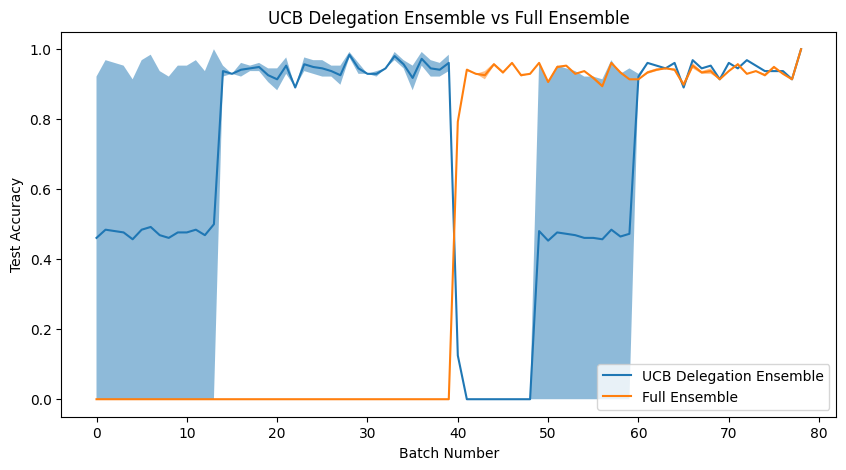

In [5]:
# make a figure with dims 10x5
fig, ax = plt.subplots(figsize=(10, 5))

# plot the average test accuracy for each batch for each ensemble
ax.plot(UCB_avg_test_accs, label="UCB Delegation Ensemble")
ax.fill_between(
    range(len(UCB_avg_test_accs)),
    np.array(UCB_avg_test_accs) - np.array(UCB_std_test_accs),
    np.array(UCB_avg_test_accs) + np.array(UCB_std_test_accs),
    alpha=0.5,
)

ax.plot(full_avg_test_accs, label="Full Ensemble")
ax.fill_between(
    range(len(full_avg_test_accs)),
    np.array(full_avg_test_accs) - np.array(full_std_test_accs),
    np.array(full_avg_test_accs) + np.array(full_std_test_accs),
    alpha=0.5,
)

ax.set_xlabel("Batch Number")
ax.set_ylabel("Test Accuracy")
ax.set_title("UCB Delegation Ensemble vs Full Ensemble")
ax.legend()

plt.show()

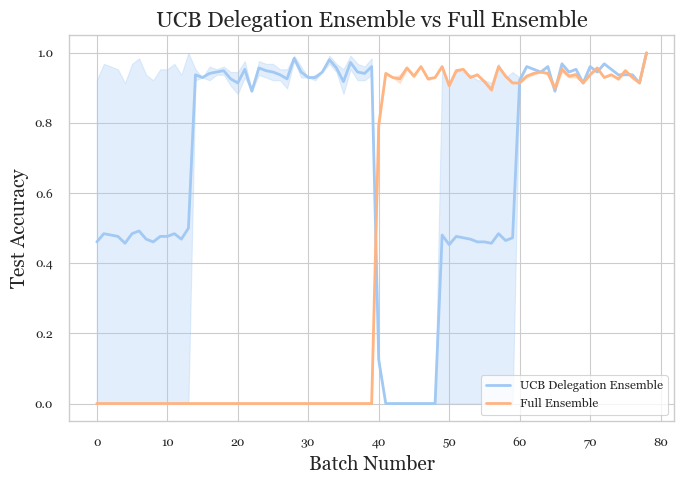

In [27]:
sns.set(style="whitegrid", palette="pastel", context="paper")

# Set the font to Georgia
mpl.rcParams["font.family"] = "Georgia"
mpl.rcParams["font.size"] = 12
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["axes.titlesize"] = 16

fig, ax = plt.subplots(figsize=(7, 5))

colors = sns.color_palette("pastel")
ucb_color = colors[0]
full_color = colors[1]

ax.plot(
    UCB_avg_test_accs, label="UCB Delegation Ensemble", color=ucb_color, linewidth=2
)
ax.fill_between(
    range(len(UCB_avg_test_accs)),
    np.array(UCB_avg_test_accs) - np.array(UCB_std_test_accs),
    np.array(UCB_avg_test_accs) + np.array(UCB_std_test_accs),
    color=ucb_color,
    alpha=0.3,
)

ax.plot(full_avg_test_accs, label="Full Ensemble", color=full_color, linewidth=2)
ax.fill_between(
    range(len(full_avg_test_accs)),
    np.array(full_avg_test_accs) - np.array(full_std_test_accs),
    np.array(full_avg_test_accs) + np.array(full_std_test_accs),
    color=full_color,
    alpha=0.3,
)

# Setting labels, title, and legend
ax.set_xlabel("Batch Number")
ax.set_ylabel("Test Accuracy")
ax.set_title("UCB Delegation Ensemble vs Full Ensemble")

ax.legend()

plt.tight_layout()

# Show the plot
plt.show()